<a href="https://colab.research.google.com/github/dolmani38/Summary/blob/master/GAN-based_Korean_summarizer_using_probability_distribution_by_phrase.v0.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN based Korean summarizer using probability distribution by phrase

---
이훈석(1), 안순홍(2), 김승훈(교신)

---



## Abstract

 영어의 경우 Sate of art를 달성한 요약 알고리즘 및 모델들이 개발 되어 졌다. 대부분 GAN 이나 AVE 알고리즘을 이용하여 문장을 생성하는 방식을 기반으로 한다.
영어의 경우 English Gigaword와 같이 원문과 요약문 데이터셋을 대량으로 구비하고 있어, 요약 모델을 생성하는데 유리하다. 하지만 아직 한국어의 경우 양질의 대량 여약 데이터셋이 준비되어 있지 않다. 하여, 한국어의 경우 좋은 성능의 요약 알고리즘이 아직 연구가 미비하다.
 본 연구에서는 원문에 대한 유사 확율을 구문(?)별 추출하고 높은 확률의 구문만을 골자로 하여 나머지 원문의 구문을 재활용 추출하여 한국에 문법에 맞게 재조합 시키는 방법으로 원문을 요약하기 방법을 제안한다.[방식의 명칭을 지어야 함]
이를 통해, 대량의 요약문 데이터셋이 없어도 원문을 요약할 수 있으며, 특히, 스토리 흐름이 있는 문성의 경우, 일부 발췌가 아닌 전체 스토리를 요약할 수 있는 장점을 갖는다.



## Introduction

ref : https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/

When you open news sites, do you just start reading every news article? Probably not. We typically glance the short news summary and then read more details if interested. Short, informative summaries of the news is now everywhere like magazines, news aggregator apps, research sites, etc.

Well, It is possible to create the summaries automatically as the news comes in from various sources around the world.

The method of extracting these summaries from the original huge text without losing vital information is called as Text Summarization. It is essential for the summary to be a fluent, continuous and depict the significant.

In fact, the google news, the inshorts app and various other news aggregator apps take advantage of text summarization algorithms.

In this post, I discuss and use various traditional and advanced methods to implement automatic Text Summarization.





> * Types of Text Summarization

> Text summarization methods can be grouped into two main categories: Extractive and Abstractive methods

> * Extractive Text Summarization

> It is the traditional method developed first. The main objective is to identify the significant sentences of the text and add them to the summary. You need to note that the summary obtained contains exact sentences from the original text.

> * Abstractive Text Summarization

> It is a more advanced method, many advancements keep coming out frequently(I will cover some of the best here). The approach is to identify the important sections, interpret the context and reproduce in a new way. This ensures that the core information is conveyed through shortest text possible. Note that here, the sentences in summary are generated, not just extracted from original text.

In the next sections, I will discuss different extractive and abstractive methods. At the end, you can compare the results and know for yourself the advantages and limitations of each method.

# Related Work

* Text Summarization using Gensim with TextRank

> gensim is a very handy python library for performing NLP tasks. The text summarization process using gensim library is based on TextRank Algorithm

> What is TextRank algorithm?

> TextRank is an extractive summarization technique. It is based on the concept that words which occur more frequently are significant. Hence , the sentences containing highly frequent words are important .

> Based on this , the algorithm assigns scores to each sentence in the text . The top-ranked sentences make it to the summary.

* Text Summarization with Sumy
> Along with TextRank , there are various other algorithms to summarize text.<br>
> Don’t you think it would be very smooth and beneficial to have a library, which will let you perform summarization through multiple algorithms?<br>
> Fortunately, we already have the sumy library for it !
sumy libraray provides you several algorithms to implement Text Summarzation. Just import your desired algorithm rather having to code it on your own.<br>
> In this section, I shall discuss on implementation of the below algorithms for summarization using sumy :
>> LexRank<br>
> Luhn<br>
> Latent Semantic Analysis, LSA<br>
> KL-Sum<br>

* LexRank (ref : G¨une¸s Erkan. (2004). LexRank: Graph-based Lexical Centrality as Salience in Text Summarization, https://arxiv.org/pdf/1109.2128.pdf)
> First, let me introduce you to summarization with LexRank.
> How does LexRank work?
> A sentence which is similar to many other sentences of the text has a high probability of being important. The approach of LexRank is that a particular sentence is recommended by other similar sentences and hence is ranked higher.
> Higher the rank, higher is the priority of being included in the summarized text.

* LSA (Latent semantic analysis) (ref:참조논문 찾기)
> Latent Semantic Analysis is a unsupervised learning algorithm that can be used for extractive text summarization.<br>
> It extracts semantically significant sentences by applying singular value decomposition(SVD) to the matrix of term-document frequency. To learn more about this algorithm, check out here <br>
> Let me demonstrate how to use LSA for summarization . First, import the summarizer from sumy.

* Luhn (ref:참조논문 찾기)
> Luhn Summarization algorithm’s approach is based on TF-IDF (Term Frequency-Inverse Document Frequency). It is useful when very low frequent words as well as highly frequent words(stopwords) are both not significant.<br>
> Based on this, sentence scoring is carried out and the high ranking sentences make it to the summary.

* KL-Sum (ref:참조논문 찾기)
> Another extractive method is the KL-Sum algorithm. <br>
> It selects sentences based on similarity of word distribution as the original text. It aims to lower the KL-divergence criteria (learn more). It uses greedy optimization approach and keeps adding sentences till the KL-divergence decreases.

* What is Abstractive Text Summarization?

> Abstractive summarization is the new state of art method, which generates new sentences that could best represent the whole text. This is better than extractive methods where sentences are just selected from original text for the summary.<br>

> HuggingFace supports state of the art models to implement tasks such as summarization, classification, etc.. Some common models are GPT-2, GPT-3, BERT , OpenAI, GPT, T5.

>Another awesome feature with transformers is that it provides PreTrained models with weights that can be easily instantiated through from_pretrained() method.

>You can check the list of currently available PreTrained models here

>This section will show you text summarization through different models of transformers library

* Summarization with T5 Transformers (ref : Colin Raffel. (2020). Exploring the Limits of Transfer Learning with a Unified
Text-to-Text Transformer, https://arxiv.org/pdf/1910.10683.pdf)
>T5 is an encoder-decoder model. It converts all language problems into a text-to-text format.<br>
>First, you need to import the tokenizer and corresponding model through below command.<br>
>It is preferred to use T5ForConditionalGeneration model when the input and output are both sequences.

* Summarization with BART Transformers (ref : Mike Lewis, (2019). BART: Denoising Sequence-to-Sequence Pre-training for Natural
Language Generation, Translation, and Comprehension, https://arxiv.org/pdf/1910.13461.pdf)
> transformers library of HuggingFace supports summarization with BART models.
> Import the model and tokenizer. For problems where there is need to generate sequences , it is preferred to use BartForConditionalGeneration model.

* Summarization with GPT-2 Transformers (ref : Alec Radford, (2018). Language Models are Unsupervised Multitask Learners, https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)
>GPT-2 transformer is another major player in text summarization, introduced by OpenAI. Thanks to transformers, the process followed is same just like with BART Transformers.<br>
> First, you have to import the tokenizer and model. Make sure that you import a LM Head type model, as it is necessary to generate sequences. Next, load the pretrained gpt-2 model and tokenizer .<br>
>After loading the model, you have to encode the input text and pass it as an input to model.generate().

* Summarization with XLM Transformers (ref : Guillaume Lample, (2019). Cross-lingual Language Model Pretraining, https://arxiv.org/pdf/1901.07291.pdf)
>Another transformer type that could be used for summarization are XLM Transformers.<br>
>You can import the XLMWithLMHeadModel as it supports generation of sequences.You can load the pretrained xlm-mlm-en-2048 model and tokenizer with weights using from_pretrained() method.<br>
>The nexts steps are same as the last three cases. The encoded input text is passed to generate() function with returns id sequence for the summary. You can decode and print the summary.<br>

* GAN for Language Generation
> In this paper, we borrow the idea of GAN to make the generator output human-readable. The major challenge in applying GAN to sentence generation is the discrete nature of natural language. To generate a word sequence, the generator usually has non-differential parts such as argmax or other sample functions which cause the original GAN to fail.
In (Gulrajani et al., 2017), instead of feeding a discrete word sequence, the authors directly feed the generator output layer to the discriminator.
This method works because they use the earth mover’s distance on GAN as proposed in (Arjovsky et al., 2017), which is able to evaluate the distance between a discrete and a continuous distribution.
SeqGAN (Yu et al., 2017) tackles the sequence generation problem with reinforcement learning. Here, we refer to this approach as adversarial REINFORCE. However, the discriminator only measures the quality of whole sequence, and thus the rewards are extremely sparse and the rewards assigned to all the generation steps are all the same. MC search (Yu et al., 2017) is proposed to evaluate the approximate reward at each time step, but this method suffers from high time complexity.
Following this idea, (Li et al., 2017) proposes partial evaluation approach to evaluate the expected reward at each time step.


In [ ]:
DO_ALL = True # 전체 실행하면서 시간 걸리는 걸 Pass 하려면 이걸 False ...
USE_PRETRAINED_MODEL = True # 이미 학습한 모델을 사용하려면.. true

In [ ]:
if DO_ALL:
    !pip install sentence-transformers==0.3.0
    !pip install transformers==3.0.2
    !pip install wikipedia
    !pip install konlpy

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 1.5MB 7.7MB/s 
     |████████████████████████████████| 890kB 44.4MB/s 
     |████████████████████████████████| 2.9MB 47.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.0-cp36-none-any.whl size=86754 sha256=a59412b8c2df2ec12aa5376910b5487d23598d5869dc12307283d6b519b4cf74
  Stored in directory: /root/.cache/pip/wheels/b8/23/85/85d6a9a6c68f0625a1ecdaad903bb0a78df058c10cf74f9de4
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=9aec4dafaa48ddda45f40c99fa4a51d2be84d0a4c787cb9a63a3bc481aeea06a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses
     |████████████████████████████████| 778kB 4.2MB/s 
     |████████████████████████████████| 1.1MB 38.6MB/s 
     |████████████████████████████████| 3.0MB 37.2MB/s 
  Fo

In [ ]:
# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, LSTM, Dense, Dropout,Conv1D, MaxPooling1D, Flatten, Add, LeakyReLU
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential, model_from_json
from tensorflow.python.framework import tensor_shape
import keras.utils as ku 

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input,
                                     Dense, 
                                     BatchNormalization, 
                                     LeakyReLU,
                                     Softmax,
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten,
                                     Concatenate,
                                     Lambda)
import matplotlib.pyplot as plt
# set seeds for reproducability
from tensorflow.random import set_seed
from numpy.random import seed
set_seed(2)
seed(1)

import pandas as pd
import numpy as np
import string, os 

import urllib.request
import nltk
nltk.download('punkt')

from konlpy.tag import Okt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# 간단한 전처리
def clean_text(txt):
    txt = txt.replace('\n',' ')
    txt = txt.replace('\r',' ')    
    txt = txt.replace('=','')
    txt = txt.replace('\"','')   
    txt = txt.replace('\'','')
    txt = txt.replace(',','')
    txt = txt.replace('..','')
    txt = txt.replace('.','. ')
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')           
    return txt 

In [ ]:
# load ascii text and covert to lowercase

def get_sample_text(target_url):
    raw_text = urllib.request.urlopen(target_url).read().decode('utf-8')
    return nltk.sent_tokenize(clean_text(raw_text))

In [ ]:
ko_sentences_dataset = []
if USE_PRETRAINED_MODEL:
    ko_sentences_dataset += get_sample_text("https://raw.githubusercontent.com/dolmani38/Summary/master/data/korean_sample.txt")
    # 여기서 계속 수집...
    ko_sentences_dataset += get_sample_text("https://raw.githubusercontent.com/dolmani38/Summary/master/data/%EC%95%A0%EA%B1%B0%EC%84%9C%ED%81%AC%EB%A6%AC%EC%8A%A4%ED%8B%B0-ABC%20%EC%82%B4%EC%9D%B8%EC%82%AC%EA%B1%B4.txt")

    ko_sentences_dataset += get_sample_text("https://raw.githubusercontent.com/dolmani38/Summary/master/data/%EC%95%A0%EA%B1%B0%EC%84%9C%ED%81%AC%EB%A6%AC%EC%8A%A4%ED%8B%B0-%EA%B7%B8%EB%A6%AC%EA%B3%A0%20%EC%95%84%EB%AC%B4%EB%8F%84%20%EC%97%86%EC%97%88%EB%8B%A4.txt")

In [ ]:

# false 문장을 만들기 위해 shffle 함수 준비
import random

def shuffling(txt):
    txt_list = txt.split(' ')
    random.shuffle(txt_list)
    return ' '.join(txt_list)

# true 문장, false 문장의 생성
ko_grammar_dataset = []

if USE_PRETRAINED_MODEL:
    for txt in ko_sentences_dataset:
        txt = txt.strip()
        if len(txt) > 40:
            #ko_grammar_dataset.append([txt,1])
            txt = txt.replace('.','')
            ko_grammar_dataset.append([txt,1]) # '.'의 위치를 보고 True, False를 판단 하기 땜에...
            ko_grammar_dataset.append([shuffling(txt),0])
        
    # dataset을 전체적으로 다시 썩는다.
    random.shuffle(ko_grammar_dataset)

In [ ]:
okt = Okt()

# 형태소 Code table의 구성

_MAX_MORP_LENGTH = 128
_PADDING_CODE = 0  # padding code
_MISMATCH_CODE = 1 # mismatch word code               ex) @@@
_MISMATCH_WORD = '@@@' # 이거 아래에서 쓴다.

morpheme_table = {}
morp_code = _MISMATCH_CODE+1
morpheme_table['Pad'] = _PADDING_CODE 
morpheme_table['Mst'] = _MISMATCH_CODE 
'''
 Pad               0
 Mst               1
 Noun              2
 Punctuation       3
 Foreign           4
 Josa              5
 Verb              6
 Modifier          7
 Adjective         8
 Suffix            9
 Adverb            10
 Number            11
 Alpha             12
 Determiner        13
 Conjunction       14
 Exclamation       15
 KoreanParticle    16
 URL               17
 VerbPrefix        18
 Eomi              19
 Hashtag           20
 PreEomi           21
'''
morpheme_table['Noun']=2
morpheme_table['Punctuation']=3
morpheme_table['Foreign']=4
morpheme_table['Josa']=5
morpheme_table['Verb']=6
morpheme_table['Modifier']=7
morpheme_table['Adjective']=8
morpheme_table['Suffix']=9
morpheme_table['Adverb']=10
morpheme_table['Number']=11
morpheme_table['Alpha']=12
morpheme_table['Determiner']=13
morpheme_table['Conjunction']=14
morpheme_table['Exclamation']=15
morpheme_table['KoreanParticle']=16
morpheme_table['URL']=17
morpheme_table['VerbPrefix']=18
morpheme_table['Eomi']=19
morpheme_table['Hashtag']=20
morpheme_table['PreEomi']=21
morpheme_table['Email']=22

In [ ]:

print('Korean morpheme code table')
print('----------------------------------------------------------')
print('  Morpheme        Code')
print('')
for morp in morpheme_table.keys():
    print(f' {morp.ljust(15)}   {morpheme_table[morp]}')
print('----------------------------------------------------------')

Korean morpheme code table
----------------------------------------------------------
  Morpheme        Code

 Pad               0
 Mst               1
 Noun              2
 Punctuation       3
 Foreign           4
 Josa              5
 Verb              6
 Modifier          7
 Adjective         8
 Suffix            9
 Adverb            10
 Number            11
 Alpha             12
 Determiner        13
 Conjunction       14
 Exclamation       15
 KoreanParticle    16
 URL               17
 VerbPrefix        18
 Eomi              19
 Hashtag           20
 PreEomi           21
 Email             22
----------------------------------------------------------


In [ ]:

# morpheme 코드 변환기 준비
def morpheme_encode(sentence):
    encode=[]
    morphemes = okt.pos(sentence)
    x = np.zeros((_MAX_MORP_LENGTH, len(morpheme_table)), dtype=np.bool)
    for i, (word,morp) in enumerate(morphemes):
        if i < _MAX_MORP_LENGTH:
            code = _MISMATCH_CODE if word==_MISMATCH_WORD else morpheme_table[morp]
            x[i,code] = 1.0   
    return x

ko_morpheme_x = []
ko_morpheme_y = []

if USE_PRETRAINED_MODEL:
    try:
        ko_morpheme_x = np.load('ko_morpheme_x.npy')
        ko_morpheme_y = np.load('ko_morpheme_y.npy')
        print('dataset load from file.')
        print('ko_morpheme_x.shape',ko_morpheme_x.shape)
        print('ko_morpheme_y.shape',ko_morpheme_y.shape)
    except Exception as ex:
        print(ex)
else:
    #true / false 문장을 morpheme 코드로 모두 변환
    tc = len(ko_grammar_dataset)

    for i, (txt,label) in enumerate(ko_grammar_dataset):
        print(f'\r {i+1}/{tc}', end="", flush=True)
        ko_morpheme_x.append(morpheme_encode(txt))
        ko_morpheme_y.append([label])

    ko_morpheme_x = np.asarray(ko_morpheme_x)
    ko_morpheme_y = np.asarray(ko_morpheme_y)
    np.save('ko_morpheme_x',ko_morpheme_x)
    np.save('ko_morpheme_y',ko_morpheme_y)


[Errno 2] No such file or directory: 'ko_morpheme_x.npy'


In [ ]:

from sklearn.model_selection import train_test_split
try: 
    # 20%를 testset으로 사용.,,
    X_train, X_test, y_train, y_test = train_test_split(ko_morpheme_x,ko_morpheme_y,test_size=0.2)

    print(f'Shape of X_train;{X_train.shape}')
    print(f'Shape of X_test ;{X_test.shape}')
    print(f'Shape of y_train;{y_train.shape}')
    print(f'Shape of y_test ;{y_test.shape}')
except Exception as ex:
    print(ex)    

With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.


In [ ]:
from keras import backend as K

def r2(y_true, y_pred):
    """
    # custom R2-score metrics for keras backend
    :param y_true: 실측 데이터
    :param y_pred: 모델에 의한 예측 데이테
    :return: R^2 value, 이 값이 높다고 (예:0.99)해서 예측 값이 정확 하다고 할 수 는 없음...
    """
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [ ]:
if USE_PRETRAINED_MODEL:
    model_json_url = "https://raw.githubusercontent.com/dolmani38/Summary/master/models/morpheme_model.json"
    model_weight_url = "https://github.com/dolmani38/Summary/blob/master/models/morpheme_model.h5?raw=true"
    loaded_model_json = urllib.request.urlopen(model_json_url).read().decode('utf-8')
    morpheme_model = model_from_json(loaded_model_json)
    urllib.request.urlretrieve(model_weight_url, "morpheme_model.h5")
    morpheme_model.load_weights("morpheme_model.h5")
    morpheme_model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[r2])
    print('Use pretrained model...')
else:
    # model build
    morpheme_model = Sequential()
    morpheme_model.add(Conv1D(filters=256, kernel_size=4, padding='same',activation='relu',input_shape=(_MAX_MORP_LENGTH, len(morpheme_table))))
    morpheme_model.add(MaxPooling1D(pool_size=2))
    morpheme_model.add(Conv1D(filters=128, kernel_size=4, padding="same",activation='relu'))
    morpheme_model.add(MaxPooling1D(pool_size=2))
    morpheme_model.add(Flatten())
    morpheme_model.add(Dense(128))
    morpheme_model.add(Dense(1, activation='linear'))
    morpheme_model.summary() #Print model Summary

    morpheme_model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[r2])
    hist = morpheme_model.fit(X_train, y_train, epochs=30)

discriminator = morpheme_model

Use pretrained model...


In [ ]:

# 학습결과 확인
try:
    results = morpheme_model.evaluate(X_test, y_test)
    print('mean_squared_error:',results)

    # 학습 결과의 확인
    predicts = morpheme_model.predict(X_test)
    predicts = np.asarray(predicts)
    predicts = [ 1 if x>0.5 else 0 for [x] in predicts]
    y = np.asarray(y_test)
    y = y.reshape(y.shape[0],)

    from sklearn.metrics import classification_report
    print(classification_report(y, predicts))
except Exception as ex:
    print(ex)

name 'X_test' is not defined


In [ ]:
if USE_PRETRAINED_MODEL:
    pass
else:
    model_json = morpheme_model.to_json()
    with open("morpheme_model.json", "w") as json_file:
        json_file.write(model_json)
    json_file.close()
    print("save network to morpheme_model.json")

    morpheme_model.save_weights("morpheme_model.h5")
    print("save weights to morpheme_model.h5")

In [ ]:
def morpheme_discriminator(queries):
    # queries : 복수의 문장의 2차원 배열 (None,1)
    # return : 결과 score 배열 (None,)
    x_codes = []
    for query in queries:
        x_codes.append(morpheme_encode(query))
    scores = morpheme_model.predict(np.array(x_codes))
    return scores #1.0 if scores > 0.5 else 0.0 

In [ ]:
morpheme_discriminator([' 무럭무럭 자라서, 아기는 소녀가 예쁘고 마음씨 고운 되었어요'])

array([[0.20912033]], dtype=float32)

In [ ]:
org_text = """나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데, 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고, 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다.
사슴은 은혜를 갚겠다고 하면서, 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기, 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다. 그렇게 잠시간 기다리자 과연, 선녀들이 하늘에서 내려와 날개옷을 벗고 선녀탕에서 목욕을 하는 것이었다. 나무꾼은 사슴이 가르쳐준 대로 날개옷을 하나 훔쳤다.
날개옷이 없어진 탓에 한 명의 선녀는 하늘로 올라가지 못했으며 다른 선녀들은 날개옷이 없는 선녀를 내버려두고 하늘로 돌아갔다. 이때 나무꾼이 홀로 남은 선녀에게 자신의 아내가 되어달라고 하자, 하늘나라로 올라가지 못하게 된 선녀는 할 수 없이 나무꾼에게 의탁하게 되었다.
"""

In [ ]:
org_text = """옛날 어느 집에 귀여운 여자 아기가 태어났어요.
아기는 무럭무럭 자라서, 예쁘고 마음씨 고운 소녀가 되었어요.
그러던 어느날, 소녀의 어머니가 병이들어 그만 세상을 떠나고 말았어요.
소녀의 아버지는 홀로 남은 소녀가 걱정되었어요.
그래서 얼마 후 새어머니를 맞이했어요.
새어머니는 소녀보다 나이가 위인 두 딸을 데리고 왔어요.
그러나 새어머니와 언니들은 성질이 고약한 심술쟁이들이었어요.
새어머니는 소녀가 자기 딸들보다 예쁘고 착한 게 못마땅했어요.
그런데 이번에는 아버지마저 돌아가셨어요.
소녀는 하녀처럼 하루 종일 쓸고, 닦고, 집안일을 도맡아 했어요.
해도 해도 끝이 없는 집안일이 힘들어 지칠때면
난롯가에 앉아서 잠시 쉬곤 했지요.
"엄마, 저애를 신데렐라라고 불러야겠어요."
"온통 재투성이잖아요. 호호호!" 두 언니는 소녀를 놀려 댔어요.
어느 날, 왕궁에서 무도회가 열렸어요.
신데렐라의 집에도 초대장이 왔어요.
새어머니는 언니들을 데리고 무도회장으로 떠났어요.
신데렐라도 무도회에 가고 싶었어요.
혼자 남은 신데렐라는 훌쩍훌쩍 울기 시작했어요.
"신데렐라, 너도 무도회에 가고 싶니?"
신데렐라가 고개를 들어보니, 마법사 할머니가 빙그레 웃고 있었어요.
"내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴."
마법사 할머니가 주문을 외웠어요.
그리고 지팡이로 호박을 건드리자, 호박이 화려한 황금 마차로 변했어요.
이번에는 생쥐와 도마뱀을 건드렸어요.
그랬더니 생쥐는 흰말로, 도마뱀은 멋진 마부로 변했답니다.
신데렐라의 옷도 구슬 장식이 반짝이는 예쁜 드레스로 바뀌웠어요.
"신데렐라, 발을 내밀어 보거라."
할머니는 신데렐라에게 반짝반짝 빛나는 유리 구두를 신겨 주었어요.
"신데렐라, 밤 열두시가 되면 모든게 처음대로 돌아간단다. 황금 마차는 호박으로, 흰말은 생쥐로, 마부는 도마뱀으로 변하게 돼. 그러니까 반드시 밤 열두 시가 되기 전에 돌아와야 해. 알겠지?"
왕자님도 아름다운 신데렐라에게 마음을 빼았겼어요.
왕자님은 무도회장에 모인 다른 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요.
신데렐라는 왕자님과 춤을 추느라 시간 가는 줄도 몰랐어요.
땡, 땡, 땡...... 벽시계가 열두 시를 알리는 소리에 신데렐라는 화들짝 놀랐어요.
신데렐라가 허둥지둥 왕궁을 빠져나가는데,
유리 구두 한 짝이 벗겨졌어요.
하지만 구두를 주울 틈이 없었어요.
신데렐라를 뛰쫓아오던 왕자님은 층계에서 유리 구두 한 짝을 주웠어요.
왕자님은 유리 구두를 가지고 임금님께 가서 말했어요.
"이 유리 구두의 주인과 결혼하겠어요."
그래서 신하들은 유리 구두의 주인을 찾아 온 나라를 돌아다녔어요.
언니들은 발을 오므려도 보고, 구두를 늘려도 보았지만 한눈에 보기에도 유리 구두는 너무 작았어요.
그때, 신데렐라가 조용히 다가와 말했어요.
"저도 한번 신어 볼 수 있나요?"
신데렐라는 신하게 건넨 유리 구두를 신었어요,
유리 구두는 신데렐라의 발에 꼭 맞았어요.
신하들은 신데렐라를 왕궁으로 데리고 갔어요.
그 뒤 신데렐라는 왕자님과 결혼하여 오래오래 행복하게 살았대요."""

In [ ]:
org_text = clean_text(org_text).strip()
org_text

'나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다. 사슴은 은혜를 갚겠다고 하면서 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다. 그렇게 잠시간 기다리자 과연 선녀들이 하늘에서 내려와 날개옷을 벗고 선녀탕에서 목욕을 하는 것이었다. 나무꾼은 사슴이 가르쳐준 대로 날개옷을 하나 훔쳤다. 날개옷이 없어진 탓에 한 명의 선녀는 하늘로 올라가지 못했으며 다른 선녀들은 날개옷이 없는 선녀를 내버려두고 하늘로 돌아갔다. 이때 나무꾼이 홀로 남은 선녀에게 자신의 아내가 되어달라고 하자 하늘나라로 올라가지 못하게 된 선녀는 할 수 없이 나무꾼에게 의탁하게 되었다.'

In [ ]:
org_sentence_dataset = nltk.sent_tokenize(clean_text(org_text))
org_morpheme_x = []
for sentence in org_sentence_dataset:
    org_morpheme_x.append(morpheme_encode(sentence))
#np.random.choice(5, 3)

def get_org_morpheme_sample(num):
    return np.asarray(org_morpheme_x)[np.random.choice(len(org_morpheme_x), num)]

get_org_morpheme_sample(3).shape

(3, 128, 23)

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer

if DO_ALL:
    # embedder download...
    embedder = SentenceTransformer('xlm-r-large-en-ko-nli-ststb')

100%|██████████| 1.80G/1.80G [02:10<00:00, 13.7MB/s]


In [ ]:
# 생성된 문장의 원문 유사도를 측정하기 위한 함수

import scipy
#print(doc_emb)
def similarity_discriminator(queries,org_embedding):
    # queries : 복수의 문장의 2차원 배열 (None,1)
    # org_embedding : 비교 대상의 원문 embedding 1차원 배열 (1,)
    # return : 결과 score 배열 (None,)
    total_score = 0
    query_embeddings = embedder.encode(queries,show_progress_bar=False)
    for query, query_embedding in zip(queries, query_embeddings):
        distances = scipy.spatial.distance.cdist([query_embedding], [org_embedding], "cosine")[0]
        results = zip(range(len(distances)), distances)
        for idx, distance in results:
            total_score += 1-distance
    return total_score

In [ ]:

# 원문의 embedding...
org_text_emb = embedder.encode([org_text],show_progress_bar=False)[0]
org_text_emb

array([ 0.37110206, -0.19225682, -0.25144747, ..., -0.17844181,
        0.41148984,  0.5338639 ], dtype=float32)

In [ ]:
org_term_set = (' ' + org_text + ' ').split(' ')

_MAX_GEN_TOKEN = 40
_NOISE_DIM = len(org_term_set)

word_table = {}
morp_table = {}

for index, word in zip(range(len(org_term_set)),org_term_set):
    word_table[index] = word
    m = okt.pos(word)
    morp_table[index] = m[0][1] if len(m) > 0 else ''
    
print('Token table of origin text')
print('---------------------------------------------')
print(' Code     Morp           Token     ')
print('')
for k in word_table.keys():
  print( f'  {str(k).ljust(5)} {morp_table[k].ljust(10)}  {word_table[k]}')
print('---------------------------------------------')

Token table of origin text
---------------------------------------------
 Code     Morp           Token     

  0                 
  1     Noun        나무꾼이
  2     Noun        나무를
  3     Verb        하다가
  4     Noun        숲
  5     Noun        속에서
  6     Verb        도망치는
  7     Noun        사슴을
  8     Verb        만났는데
  9     Noun        이
  10    Noun        사슴이
  11    Noun        사냥꾼이
  12    Verb        쫓아오고
  13    Adjective   있으니
  14    Noun        자신을
  15    Verb        숨겨달라고
  16    Noun        말했다.
  17    Noun        말하는
  18    Noun        사슴을
  19    Adjective   신기하게
  20    Verb        여긴
  21    Noun        나무꾼이
  22    Noun        사슴을
  23    Verb        숨겨줬고
  24    Noun        뒤쫓아
  25    Noun        온
  26    Noun        사냥꾼을
  27    Noun        다른
  28    Noun        방향으로
  29    Verb        보내서
  30    Noun        구해주었다.
  31    Noun        사슴은
  32    Noun        은혜를
  33    Verb        갚겠다고
  34    Verb        하면서
  35    Noun        나무꾼에게
  36    Noun      

In [ ]:
sota_text = """소녀의 언니들은 심술쟁이들 이었어요. 소녀는 집안일을 도맡아 했어요. 신데렐라도 무도회에 가고 싶었어요. 
마법사 할머니가 주문을 외웠어요. 황금 마차로 드레스로 바뀌웠어요. 밤 열두시가 되면 처음대로 돌아간단다. 
왕자님도 신데렐라에게 마음을 빼았겼어요. 벽시계가 열두 시를 알리는 소리에 놀랐어요. 유리 구두 벗겨졌어요. 
왕자님은 주인을 찾아 돌아다녔어요. 구두는 신데렐라의 발에 맞았어요."""

In [ ]:
print('Similarity of sota:',similarity_discriminator([sota_text],org_text_emb))

Similarity of sota: 0.5623787199364326


In [ ]:
# Print iterations progress
class ProgressBar:

    def __init__(self,total=20, prefix = '', suffix = '', decimals = 1, length = 20, fill = '|', printEnd = "\r"):
        self.total = total
        self.prefix = prefix
        self.suffix = suffix
        self.decimals = decimals
        self.length = length
        self.fill = fill
        self.printEnd = printEnd
        self.ite = 0

    def printProgress(self,iteration, text):
        self.ite += iteration
        percent = ("{0:." + str(self.decimals) + "f}").format(100 * (self.ite / float(self.total)))

        filledLength = int(self.length * self.ite // self.total)
        bar = self.fill * filledLength + '.' * (self.length - filledLength)
        print(f'\r{self.prefix} |{bar}| {percent}% {self.suffix}  {text}', end="", flush=True)
        # Print New Line on Complete
        if self.ite == self.total: 
            print()

In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram


# weight 들의 초기화
terms = np.array(list(word_table.values()))

story_filters=np.array([[0,1],[0,1,2],[0,1,2,3]]) # ,[0,1,2,3,4],[0,2,4,6]])#,[0,2],[0,2,4],[0,2,4,6],[0,2,4,6,8]])
word_filters=np.array([[0]])

story_weights = np.zeros(_NOISE_DIM,)
word_weights = np.zeros(_NOISE_DIM,)

#filters=np.array([[0,2],[0,2,4],[0,2,4,6],[0,2,4,6,8]])
#filters=np.array([[0,1,2,3,4,5]])
terms = np.array(list(word_table.values()))
morps = np.array(list(morp_table.values()))

# story에 지배적인 word를 찾는다.

# 먼저 word의 강세 분석
for filter in word_filters:
    #print(filter)
    last_idx = len(terms)-(max(filter)+1)
    pb = ProgressBar(last_idx,prefix='word density scan :')
    for conv in range(last_idx,0,-1):
        pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
        t = np.array(filter) + conv
        '''
        w = terms[t][0]
        if w.endswith('.'):  # '.'으로 끝나는 동사 - '술어' 는 대부분 스토리상중요한 내용 포함. 하여... 이건 제외 단어에서 skip시킴
            score = 0.0
        else:
            #part_sen = ' '.join(terms[t]) 
            #score = similarity_discriminator([part_sen],org_text_emb)
            score = similarity_discriminator([w],org_text_emb)
        '''

        if morps[t][0] in ('Adjective ','Adverb','Conjunction'):
            pass
        else:
            part_sen = ' '.join(terms[t]) 
            score = similarity_discriminator(part_sen.strip(),org_text_emb)
            word_weights[t] += score
        
# story의 강세 분석
for filter in story_filters:
    #print(filter)
    last_idx = len(terms)-(max(filter)+1)
    pb = ProgressBar(last_idx,prefix='story density scan:')
    for conv in range(last_idx,0,-1):
        pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
        t = np.array(filter) + conv
        part_sen = ' '.join(terms[t]) 
        score = similarity_discriminator([part_sen],org_text_emb)
        story_weights[t] += score

#각각의 peak를 산출
word_peaks, _ = find_peaks(word_weights, height=0)
story_peaks, _ = find_peaks(story_weights, height=0)

#두개의 peak가 겹치는 word에 대해 한개 word가 유사도에 미치는 영향이 큰것으로 간주
#해당 word를 유사도 판단 필터에서 제외하고 다시 필터링...
#이를 통해 story에 대한 word를 최대한 추출 한다.

dup_order = []
for i in range(_NOISE_DIM):
    #lst = ""
    if (i in word_peaks) and (i in story_peaks):
        if terms[i].endswith('.'):
            pass
        else:
            dup_order.append(i)
# Story에 대한 weight을 추출하기 위해, word에 유독 강세가 있는 term을 제외 시킨다.
print('Negative words:',terms[dup_order])
terms[dup_order] = '---'
'''
print('Token table of origin text')
print('---------------------------------------------')
print(' Code         Token      ')
print('')
for index, word in zip(range(len(terms)),terms):
    print( f'  {str(index).ljust(8)}    {word}')
print('---------------------------------------------')
'''
story_weights = np.zeros(_NOISE_DIM,)
# 그리고 다시 story 분석 스캔
for filter in story_filters:
    #print(filter)
    last_idx = len(terms)-(max(filter)+1)
    pb = ProgressBar(last_idx,prefix='story density scan:')
    for conv in range(last_idx):
        pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
        t = np.array(filter) + conv
        part_sen = ' '.join(terms[t]) 
        #part_sen = part_sen.replace('소녀','---')
        score = similarity_discriminator([part_sen],org_text_emb)
        story_weights[t] += score

word density scan : |||||||||||||||||||||| 100.0%   filer:[0] 1/129       
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1] 1/128       
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2] 1/127       
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2, 3] 1/126       
Negative words: ['사슴을' '사슴을' '사슴을' '사슴은' '나무꾼에게' '훔쳐' '나무꾼에게' '사슴이' '벗고' '사슴이' '나무꾼이'
 '나무꾼에게']
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1] 127/128       
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2] 126/127       
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2, 3] 125/126       


[  4  11  21  24  26  33  39  43  47  51  58  65  71  76  78  85  93 102
 105 114 120 128]


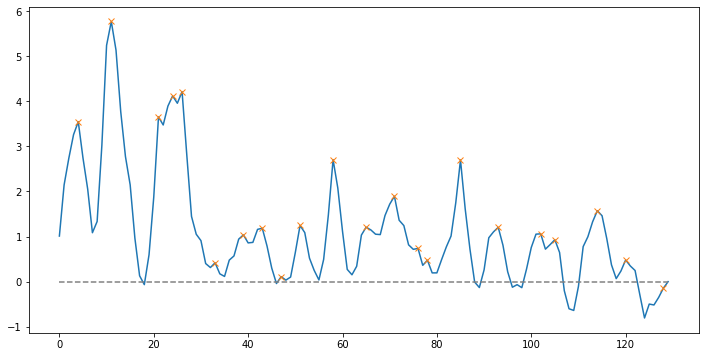

Peak count: 22


In [ ]:

# base line
base_line = 0.0
# 다시 peak 추출
story_peaks, _ = find_peaks(story_weights, height=base_line)
story_peaks = np.append(story_peaks,len(story_weights)-2)
print(story_peaks)
# story density 표출
plt.figure(figsize=(12, 6))
plt.plot(story_weights)
plt.plot(story_peaks, story_weights[story_peaks], "x")
plt.plot(np.zeros_like(story_weights)+base_line, "--", color="gray")
plt.show() 
print('Peak count:',len(story_peaks))

In [ ]:

# story skeleton 추출
skel_text = ""
for k in story_peaks:
    #print(k,term_weight[k],word_table[k])
    skel_text += word_table[k]+' '  

print(skel_text)
print('')
print(f'Peak count:{len(story_peaks)}   Similarity : {similarity_discriminator([skel_text],org_text_emb)}')

숲 사냥꾼이 나무꾼이 뒤쫓아 사냥꾼을 갚겠다고 목욕하는 목욕을 선녀의 아내로 나무꾼은 목욕을 숨겼다. 선녀들이 내려와 나무꾼은 없어진 선녀들은 선녀를 자신의 못하게 되었다. 

Peak count:22   Similarity : 0.7400024623268161


In [ ]:
for index, word in zip(range(len(org_term_set)),org_term_set):
    word_table[index] = word
    
print('Token table of origin text')
print('---------------------------------------------')
print(' Code     Score        Token              ')
print('')
for k in word_table.keys(): 
  print( f'  {str(k).ljust(5)}   {str(round(story_weights[k],4)).ljust(8)}  {word_table[k]}')
print('---------------------------------------------')

Token table of origin text
---------------------------------------------
 Code     Score        Token              

  0       1.0106    
  1       2.1436    나무꾼이
  2       2.7355    나무를
  3       3.2579    하다가
  4       3.5454    숲
  5       2.7416    속에서
  6       2.0499    도망치는
  7       1.0844    사슴을
  8       1.3335    만났는데
  9       3.017     이
  10      5.2377    사슴이
  11      5.7677    사냥꾼이
  12      5.1314    쫓아오고
  13      3.7684    있으니
  14      2.7738    자신을
  15      2.1454    숨겨달라고
  16      0.9635    말했다.
  17      0.1297    말하는
  18      -0.0664   사슴을
  19      0.5978    신기하게
  20      1.8763    여긴
  21      3.6514    나무꾼이
  22      3.4731    사슴을
  23      3.8915    숨겨줬고
  24      4.1165    뒤쫓아
  25      3.9547    온
  26      4.2119    사냥꾼을
  27      2.8076    다른
  28      1.4461    방향으로
  29      1.0509    보내서
  30      0.909     구해주었다.
  31      0.4012    사슴은
  32      0.3125    은혜를
  33      0.4176    갚겠다고
  34      0.1729    하면서
  35      0.1153    나무꾼에게
  36      0

In [ ]:

# text의 생성
def text_gen(noise, term_length):
    gtext = []
    sorted_noise = np.sort(noise)[::-1]
    order = np.where(noise > sorted_noise[term_length+1])[0][-term_length:]
    assert len(order) == term_length
    for k in order:
        gtext.append((word_table[k],k))
        #text += word_table[k]+' '    
    return gtext 

In [ ]:
term_weight = np.zeros(_NOISE_DIM,)

verbose = False
p_score = 0
scale = 50
epochs = 1000
sum_length = len(story_peaks) + int(len(story_peaks)*1.0)
pb = ProgressBar(epochs/scale,prefix='Train...')
count = 1
for epoch in range(epochs):
    noise = np.random.rand(_NOISE_DIM,)
    # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
    noise[story_peaks] += np.mean(noise) 
    noise += term_weight / count
    gtext = text_gen(noise,sum_length)
    #print(' '.join([w for (w,k) in gtext]))
    #print([k for (w,k) in gtext])    
    # 문장 단위로 잘라서 문법 체크...
    total_score = []
    tw = ""
    tk = []
    for (w,k) in gtext:
        tw += w + ' '
        tk.append(k)
        if w.endswith('.'):
            # morpheme_discriminator
            #print(tk)
            score = morpheme_discriminator([tw])[0]
            if verbose:
                print(f'score:{score} text:{tw}')
            term_weight[tk] += score
            total_score.append(score)
            tw = ""
            tk = []
            
    if len(tk) > 0:
        # morpheme_discriminator
        #print(tw)
        #print(tk)        
        score = morpheme_discriminator([tw])[0]
        if verbose:
            print(f'score:{score} text:{tw}')
        term_weight[tk] += score
        total_score.append(score)
        tw = ""
        tk = []        
            
    #term_weight[order] += score
    '''
    reward = p_score - score
    if (p_score ==0):
        pass
    else:
        term_weight[order] += reward
    p_score = score
    '''
    text = ' '.join([w for (w,k) in gtext])

    score = similarity_discriminator([text],org_text_emb)

    reward = p_score - score
    if (p_score ==0):
        pass
    else:
        term_weight[order] += reward
    s_score = score

    count += 1
    if epoch%scale == 0:
        pb.printProgress(+1,f'{epoch+scale}/{epochs} epochs, m_score:{str( np.mean(total_score)).ljust(8)} s_score:{score} {text}                                            ')

        
#plt.plot(term_weight)
plt.plot(term_weight)
plt.show()
gtext = text_gen(term_weight,sum_length)
text = ' '.join([w for (w,k) in gtext])
score = similarity_discriminator([text],org_text_emb)
print('result text : ',text)
print('result score : ',score)
print('skel_text : ',skel_text)

Train... ||...................| 5.0%   50/1000 epochs, m_score:0.18609184 s_score:0.8493128221981614 여자 아기가 태어났어요. 예쁘고 마음씨 어느날 소녀의 소녀의 아버지는 새어머니를 새어머니는 소녀보다 딸을 왔어요. 언니들은 심술쟁이들이었어요. 자기 게 못마땅했어요. 그런데 아버지마저 소녀는 하녀처럼 종일 쓸고 도맡아 해도 끝이 집안일이 힘들어 쉬곤 재투성이잖아요. 두 소녀를 신데렐라의 집에도 왔어요. 언니들을 데리고 신데렐라도 무도회에 신데렐라는 훌쩍훌쩍 신데렐라 너도 싶니? 고개를 마법사 내가 무도회에 변했어요. 도마뱀은 멋진 장식이 예쁜 신데렐라 발을 신데렐라에게 구두를 신겨 신데렐라 열두시가 마부는 돼. 반드시 밤 아름다운 마음을 왕자님은 다른 쳐다보지도 추었어요. 줄도 몰랐어요. 땡 신데렐라는 신데렐라가 허둥지둥 벗겨졌어요. 하지만 주울 없었어요. 층계에서 구두 결혼하겠어요. 그래서 유리 나라를 발을 오므려도 보고 보았지만 작았어요. 저도 한번 신어 신하게 신었어요 구두는 신데렐라의 발에 뒤                                            

KeyboardInterrupt: ignored

In [ ]:
# 효과적으로 구성된 것인지는 모르겠음... 이것은 아직 많은 연구가 필요함.
# 또한 LSTM으로 바꾸어 길이의 한게를 극복해야 할 것...

def make_generator_model(term_length):
    input = Input(shape=(term_length), dtype='float64') 
    bias_input = Input(shape=(term_length), dtype='float64') 
    output = Dense(term_length*2, use_bias=False)(input)
    output = LeakyReLU(0.2)(output)
    output = Dense(term_length*4, use_bias=False)(output)
    output = LeakyReLU(0.2)(output)
    output = Dense(term_length, use_bias=False,activation='linear')(output)
    output = Add()([output, bias_input])
    model = Model([input,bias_input],output)
    
    model.summary()
    return model


In [ ]:
generator = make_generator_model(_NOISE_DIM)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 130)]        0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 260)          33800       input_7[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_4 (LeakyReLU)       (None, 260)          0           dense_7[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 520)          135200      leaky_re_lu_4[0][0]              
____________________________________________________________________________________________

In [ ]:
def discrete_discriminator(weights,term_length,verbose=0):
    fake_gen_out = np.zeros(weights.shape)
    fake_dis_out = []
    real_dis_out = []
    real_morphemes = get_org_morpheme_sample(weights.shape[0])
    for i, noise in enumerate(weights):
        gtext = text_gen(noise,term_length)
        tw = ""
        tk = []
        fake_scores = []
        for (w,k) in gtext:
            tw += w + ' '
            tk.append(k)
            if w.endswith('.'):
                # morpheme_discriminator
                #print(tk)
                fake_score = morpheme_discriminator([tw])[0]
                fake_gen_out[i,tk] += fake_score
                fake_dis_out.append(fake_score[0])
                real_score = morpheme_model(np.array([real_morphemes[i]]))[0]
                #print(real_score)
                real_dis_out.append(real_score[0])
                if verbose:
                    print(f'score:{str(fake_score).ljust(12)} text:{tw}')
                tw = ""
                tk = []
                
        if len(tk) > 0:
            # morpheme_discriminator
            #print(tw)
            #print(tk)        
            fake_score = morpheme_discriminator([tw])[0]
            fake_gen_out[i,tk] += fake_score
            fake_dis_out.append(fake_score[0])
            real_score = morpheme_model(np.array([real_morphemes[i]]))[0]
            #print(real_score)            
            real_dis_out.append(real_score.numpy()[0])
            if verbose:
                print(f'score:{str(fake_score).ljust(12)} text:{tw}')
            tw = ""
            tk = []
        #print(fake_gen_out)
        #print(fake_dis_out)
        #print(real_dis_out)
    return tf.constant(fake_gen_out,tf.float64), tf.constant(fake_dis_out,tf.float64), tf.constant(real_dis_out,tf.float64)

In [ ]:
def discrete_discriminator2(weights,term_length,verbose=0):
    fake_gen_out = np.zeros(weights.shape)
    real_morphemes = get_org_morpheme_sample(weights.shape[0])
    fake_morps = []
    real_morps = []
    apply_order = []
    for i, noise in enumerate(weights):
        gtext = text_gen(noise,term_length)
        tw = ""
        tk = []
        fake_scores = []
        for (w,k) in gtext:
            tw += w + ' '
            tk.append(k)
            if w.endswith('.'):
                fake_morps.append(morpheme_encode(tw))
                real_morps.append(real_morphemes[i])
                apply_order.append((i,tk))
                tw = ""
                tk = []
                
        if len(tk) > 0:
            fake_morps.append(morpheme_encode(tw))
            real_morps.append(real_morphemes[i])
            apply_order.append((i,tk))

    fake_dis_out=discriminator(np.asarray(fake_morps))
    real_dis_out=discriminator(np.asarray(real_morps))
    for j, (i,tk) in enumerate(apply_order):
        fake_gen_out[i,tk] += fake_dis_out[j].numpy()

    return tf.constant(fake_gen_out,tf.float64), fake_dis_out, real_dis_out

In [ ]:
N = 1
count = tf.Variable(1.0)
tf_term_weight = tf.zeros([_NOISE_DIM])
noise = np.random.rand(N,_NOISE_DIM)
biased_noise = np.random.rand(N,_NOISE_DIM)
# stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
biased_noise[:,story_peaks] += np.mean(noise) 

In [ ]:
sw = generator([noise,biased_noise], training=False)
sw

<tf.Tensor: shape=(1, 130), dtype=float32, numpy=
array([[-2.727211  , -2.6566296 , -3.6468713 , -2.353024  , -3.4145613 ,
        -3.4427161 , -1.8853716 , -3.9607382 , -5.070578  ,  0.8872408 ,
         0.81301165,  2.5031197 , -4.3385944 , -4.8531575 , -4.7797728 ,
        -3.7902186 , -3.879929  , -3.5928535 , -4.661707  ,  1.4843042 ,
        -3.5804267 ,  3.280509  ,  2.9683967 , -1.8485756 ,  2.2089078 ,
        -2.4236448 , -3.9157438 , -4.749207  , -4.957942  , -3.4112616 ,
         1.4930211 , -4.7299266 ,  2.6713061 ,  1.5714413 , -4.384794  ,
        -4.3578877 , -5.3620815 ,  2.0236015 , -3.5562139 ,  3.928235  ,
        -3.722928  , -5.015372  , -3.6316612 ,  3.305924  , -2.8360155 ,
        -4.8435287 , -3.9334033 ,  2.181071  , -4.46212   , -4.0843196 ,
        -3.4476504 ,  3.0143917 , -4.195564  , -2.8834424 , -4.6018543 ,
        -3.2716677 , -3.0480032 ,  2.8386292 ,  4.289023  , -3.6119418 ,
         2.9379623 ,  6.4975004 , -4.3132772 , -2.8354778 , -3.7726412 ,
 

In [ ]:
.shape

(1, 128, 23)

In [ ]:
# skeleton_length + N%의 길이로 생성
gen_length = len(story_peaks) + int(len(story_peaks)*1.0)
sw = generator([noise,biased_noise], training=False)
fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator2(sw,gen_length,verbose=0)
print(fake_gen_out)
print(fake_dis_out)
print(real_dis_out)

tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.80133879 0.80133879
  0.         0.         0.         0.         0.         0.
  0.         0.80133879 0.         0.80133879 0.80133879 0.80133879
  0.80133879 0.         0.         0.         0.         0.
  0.80133879 0.         1.17922378 1.17922378 0.         0.
  0.         1.17922378 0.         1.17922378 0.         0.
  0.         1.17922378 0.         0.         0.         1.17922378
  0.         0.         0.         1.17922378 0.         0.
  0.         0.         0.         1.17922378 1.15970588 0.
  1.15970588 1.15970588 0.         0.         0.         1.15970588
  1.15970588 1.15970588 0.         0.         1.15970588 0.
  0.         0.         1.15970588 0.         1.15970588 0.
  1.15970588 0.         0.         0.         0.         0.
  0.         1.15970588 0.         1.15970588 0.         0.
  0.         0.         1.15970588 1.15970588 0.         

In [ ]:
## generator의 학습!!!

def train(epochs=10,batch_size=10):
    # In the Deepmind paper they use RMSProp however then Adam optimizer
    # improves training time
    generator_optimizer = tf.keras.optimizers.Adam(1e-4)
    # This method returns a helper function to compute cross entropy loss
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    gen_length = len(story_peaks) + int(len(story_peaks)*1.0)
    pb = ProgressBar(epochs,prefix='Train...')
    gen_loss_history = []
    dis_loss_history = []    
    for i in range(epochs):
        noise = np.random.rand(batch_size,_NOISE_DIM)
        biased_noise = np.random.rand(batch_size,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
        biased_noise[:,story_peaks] += np.mean(noise)

        with tf.GradientTape() as tape:
        
            sw = generator([noise,biased_noise], training=True)
            fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator2(sw,gen_length)
        
            gen_loss = cross_entropy(fake_gen_out, sw)

            # 진짜를 넣은 것에 대한 output
            real_loss = cross_entropy(tf.ones_like(real_dis_out), real_dis_out)
            fake_loss = cross_entropy(tf.zeros_like(fake_dis_out), fake_dis_out)
            dis_loss = real_loss + fake_loss

        # Backpropagation
        dis_grads = tape.gradient(dis_loss, discriminator.trainable_variables)
        generator_optimizer.apply_gradients(zip(dis_grads, discriminator.trainable_variables))


        noise = np.random.rand(batch_size,_NOISE_DIM)
        biased_noise = np.random.rand(batch_size,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
        biased_noise[:,story_peaks] += np.mean(noise)

        with tf.GradientTape() as tape:
            sw = generator([noise,biased_noise], training=True)
            fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator2(sw,gen_length)
            gen_loss = cross_entropy(fake_gen_out, sw)

        gen_grads = tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))

        gen_loss_history.append(gen_loss)
        dis_loss_history.append(dis_loss)

        pb.printProgress(+1,f'{i+1}/{epochs} epochs, gen_loss:{gen_loss}, dis_loss:{dis_loss}             ')

    return  {'gen_loss':gen_loss_history,'dis_loss':dis_loss_history}

In [ ]:
def genere_summary(count):
    texts = []
    gen_length = len(story_peaks) + int(len(story_peaks)*1.0)
    noise = np.random.rand(count,_NOISE_DIM)
    biased_noise = np.random.rand(count,_NOISE_DIM)
    # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
    biased_noise[:,story_peaks] += np.mean(noise)
    sw = generator.predict([noise,biased_noise])
    for noise in sw:
        gtext = text_gen(noise,gen_length)
        text = ' '.join([w for (w,k) in gtext])
        #print(text)
        texts.append(text)
    return texts


In [ ]:
history = train(epochs=50,batch_size=10)

Train... |||||||||||||||||||||| 100.0%   50/50 epochs, gen_loss:0.3115934729576111, dis_loss:1.0081886053085327             


In [ ]:
texts = genere_summary(2)
for txt in texts:
    print('text:',txt)
print('skel:',skel_text)

text: 이 사슴이 사냥꾼이 신기하게 나무꾼이 사슴을 숨겨줬고 뒤쫓아 구해주었다. 은혜를 갚겠다고 하늘에서 목욕하는 선녀들이 목욕을 선녀의 아내로 주었다. 나무꾼은 하면서도 사슴이 목욕을 하러 내려온다는 몸을 기다리자 선녀들이 내려와 선녀탕에서 나무꾼은 날개옷이 없어진 선녀는 선녀들은 선녀를 하늘로 돌아갔다. 홀로 자신의 올라가지 못하게 선녀는 할 되었다.
text: 이 사슴이 사냥꾼이 신기하게 나무꾼이 사슴을 숨겨줬고 뒤쫓아 구해주었다. 은혜를 갚겠다고 하늘에서 목욕하는 목욕을 선녀의 아내로 주었다. 나무꾼은 하면서도 사슴이 목욕을 하러 내려온다는 몸을 기다리자 선녀들이 내려와 선녀탕에서 나무꾼은 날개옷이 없어진 선녀는 선녀들은 선녀를 하늘로 돌아갔다. 나무꾼이 홀로 자신의 올라가지 못하게 선녀는 할 되었다.
skel: 숲 사냥꾼이 나무꾼이 뒤쫓아 사냥꾼을 갚겠다고 목욕하는 목욕을 선녀의 아내로 나무꾼은 목욕을 숨겼다. 선녀들이 내려와 나무꾼은 없어진 선녀들은 선녀를 자신의 못하게 되었다. 
